# Visualizing The Gender Gap in College Degrees

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. 

Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.



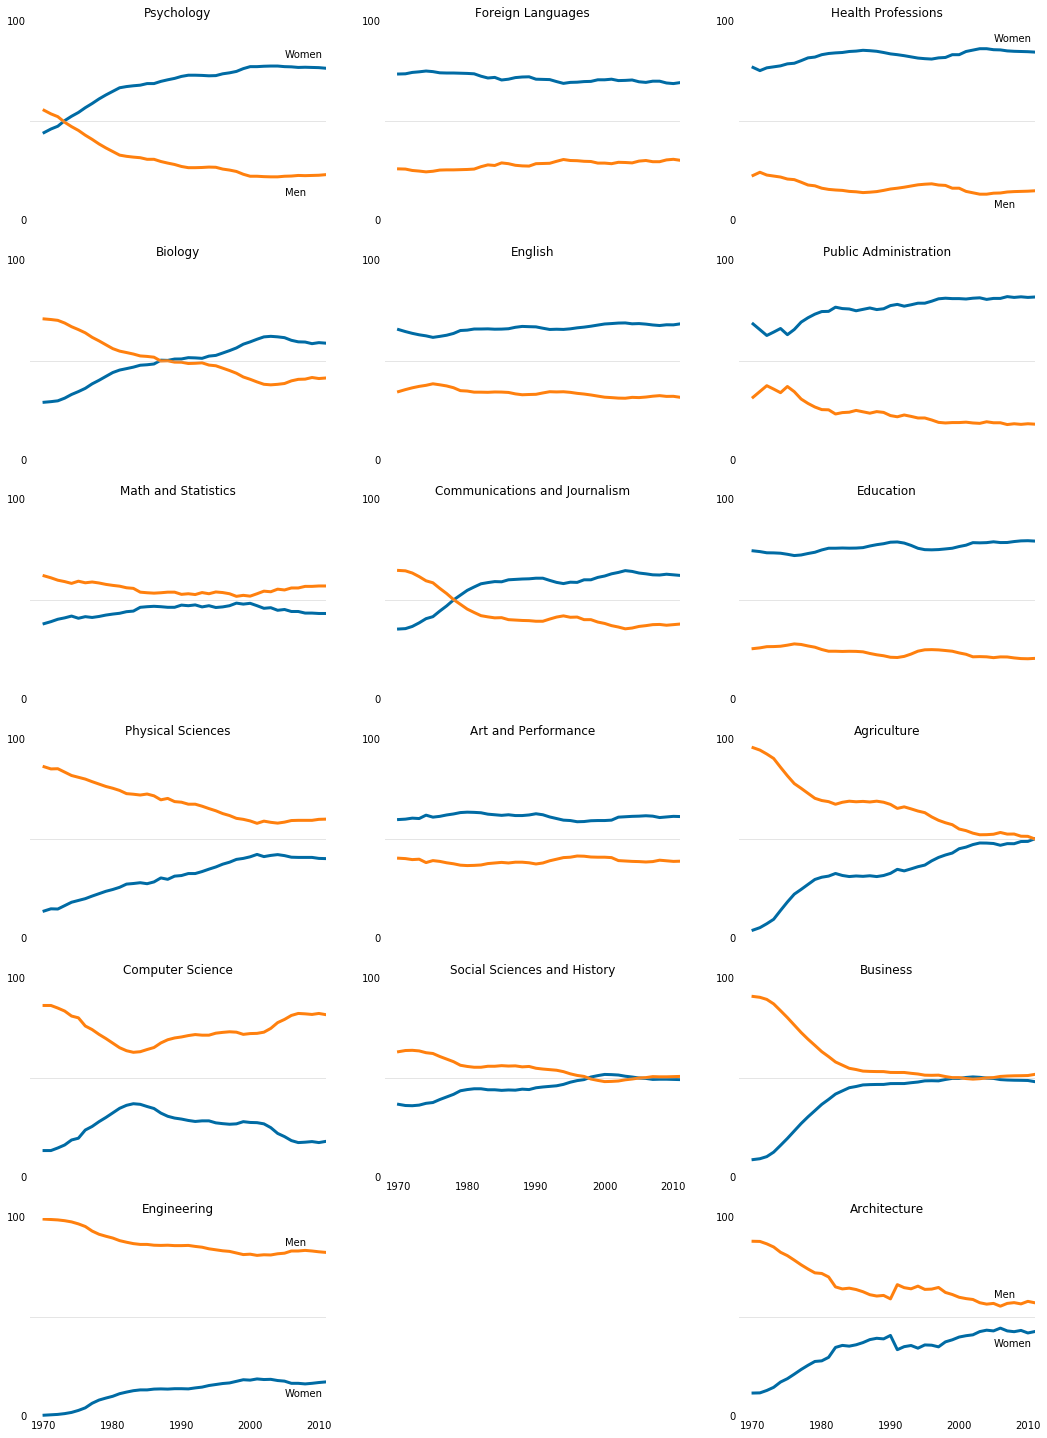

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(18, 25))

for sp in range(0, 18):
    if sp == 16:
        continue
    
    # select which catogory
    n = (sp + 1)%3
    if n == 1:
        cats = stem_cats
    elif n == 2:
        cats = lib_arts_cats
    else:
        cats = other_cats
    # index for choosing elements from category lists
    row = int(sp/3)
    
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[cats[row]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[cats[row]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(cats[row])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 82, 'Women')
        ax.text(2005, 13, 'Men')
    elif sp == 2:
        ax.text(2005, 7, 'Men')
        ax.text(2005, 90, 'Women')
    elif sp == 15:
        ax.text(2005, 86, 'Men')
        ax.text(2005, 10, 'Women')
    elif sp == 17:
        ax.text(2005, 60, 'Men')
        ax.text(2005, 35, 'Women')
    
    # taking off all x_axis labels except the bottom ones
    ax.tick_params(bottom='off', top='off', left='off', right='off', labelbottom='off')
    if sp in [13, 15, 16, 17]:
        ax.tick_params(labelbottom='on')
    
    # keep 0 and 100 for y-axis label
    ax.set_yticks([0, 100])
    
    # add horizontal line across all of the line charts where
    # the y-axis label 50 would have been
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

plt.savefig('gender_degree.png')
plt.show()